In [21]:
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.datasets as datasets
import numpy as np
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as T
import torchvision
from torch.utils.tensorboard import SummaryWriter


class Discriminator(nn.Module):
    def __init__(self, img_dim):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            nn.Linear(img_dim, 256),
            nn.LeakyReLU(0.1),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.disc(x)


class LinearGenerator(nn.Module):
    def __init__(self, z_dim, img_dim):
        super(LinearGenerator, self).__init__()
        self.gen = nn.Sequential(
            nn.Linear(z_dim, 128),
            nn.LeakyReLU(0.1),
            nn.Linear(128, img_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.gen(x)


class CnnGenerator(nn.Module):
    def __init__(self, z_dim, img_dim):
        super(LinearGenerator, self).__init__()
        self.img_dim = img_dim
        self.gen = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(3, 3)),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=(3, 3)),   
        )

    def forward(self, x):
        x = self.gen(x)
        x = x.view((x.shape[0], x.shape[1]*x.shape[2]*x.shape[3]))
        x = nn.Linear(x.shape[1]*x.shape[2]*x.shape[3], 128),
        x = nn.Linear(128, self.img_dim)
        x = nn.Tanh()(x)
        return x






In [22]:
# Hyperparameters:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
lr = 3e-4
z_dim = 64 #128, 256
img_dim = 28*28*1
batch_size = 32
EPOCHS = 50

# Training:
disc = Discriminator(img_dim).to(device=DEVICE)
gen = LinearGenerator(z_dim, img_dim).to(device=DEVICE)
fixed_noise = torch.randn((batch_size, z_dim)).to(DEVICE)

transforms = T.Compose([T.ToTensor(), T.Normalize((0.5,), (0.5,))])

dataset = datasets.MNIST(root="mnist_data/", transform=transforms, download=True)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
opt_disc = optim.Adam(disc.parameters(), lr=lr)
opt_gen = optim.Adam(gen.parameters(), lr=lr)
criterion = nn.BCELoss()
writer_fake = SummaryWriter(f"runs/GAN_MNIST/fake")
writer_real = SummaryWriter(f"runs/GAN_MNIST/real")
step = 0

print("training \n")

training 



In [25]:
for epoch in range(EPOCHS):
    for batch_idx, (real, unused) in enumerate(loader):
        real = real.view(-1, 784).to(device=DEVICE)
        batch_size = real.shape[0]

        # Discriminator loss = max [log(D(real)) + log(1 - D(G(z)))]
        noise = torch.randn((batch_size, z_dim)).to(DEVICE)
        fake = gen(noise)
        disc_real = disc(real).view(-1)
        lossD_real = criterion(disc_real, torch.ones_like(disc_real)) # log(D(real))
        disc_fake = disc(fake).view(-1)
        lossD_fake = criterion(disc_fake, torch.zeros_like(disc_fake)) # log(1 - D(G(z)))
        lossD = (lossD_real + lossD_fake) / 2
        disc.zero_grad()
        lossD.backward(retain_graph=True)
        opt_disc.step()

        # Generator loss = max log(D(G(z)))
        output = disc(fake).view(-1)
        lossG = criterion(output, torch.ones_like(output))
        gen.zero_grad()
        lossG.backward()
        opt_gen.step()

        if batch_idx == 0:
            print(f"Epoch [{epoch}/{EPOCHS}] Loss D: {lossD:.4f}, loss G: {lossG:.4f}")


Epoch [0/50] Loss D: 0.2773, loss G: 1.9905
Epoch [1/50] Loss D: 0.6681, loss G: 0.8783
Epoch [2/50] Loss D: 0.4183, loss G: 1.2823
Epoch [3/50] Loss D: 0.5723, loss G: 1.0605
Epoch [4/50] Loss D: 0.4025, loss G: 1.4235
Epoch [5/50] Loss D: 0.3443, loss G: 1.6048
Epoch [6/50] Loss D: 0.4117, loss G: 1.6179
Epoch [7/50] Loss D: 0.7779, loss G: 0.9131
Epoch [8/50] Loss D: 0.7781, loss G: 1.5535
Epoch [9/50] Loss D: 0.5870, loss G: 1.2355
Epoch [10/50] Loss D: 0.4975, loss G: 1.4776
Epoch [11/50] Loss D: 0.3352, loss G: 2.9445
Epoch [12/50] Loss D: 0.3302, loss G: 2.0148
Epoch [13/50] Loss D: 0.4091, loss G: 2.1964
Epoch [14/50] Loss D: 0.4653, loss G: 1.7479
Epoch [15/50] Loss D: 0.3903, loss G: 2.4523
Epoch [16/50] Loss D: 0.2393, loss G: 2.2915
Epoch [17/50] Loss D: 0.5485, loss G: 2.2810
Epoch [18/50] Loss D: 0.5170, loss G: 1.4648
Epoch [19/50] Loss D: 0.4859, loss G: 2.0313
Epoch [20/50] Loss D: 0.4829, loss G: 1.8344
Epoch [21/50] Loss D: 0.5343, loss G: 1.8835
Epoch [22/50] Loss D

abpve are predictions, below are ground truths 




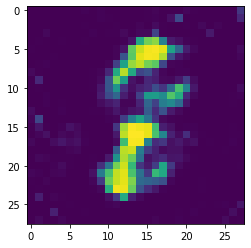

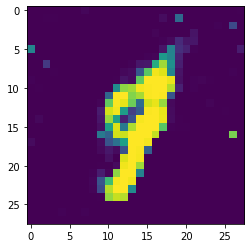

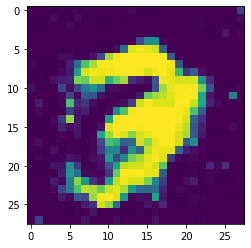

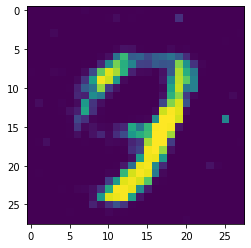

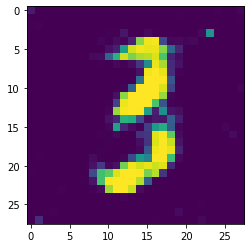

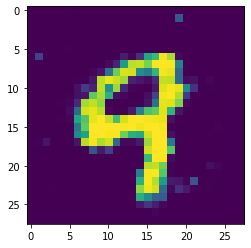

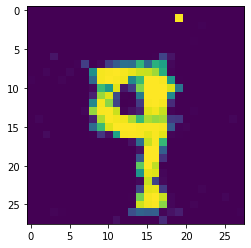

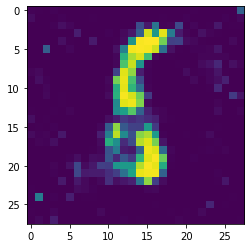

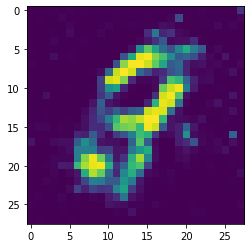

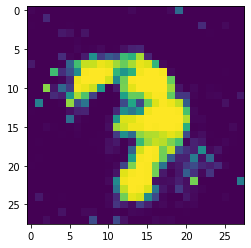

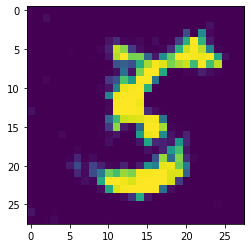

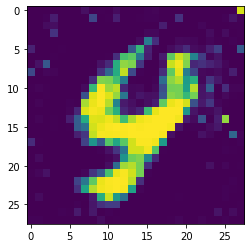

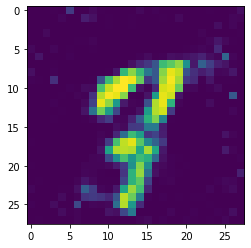

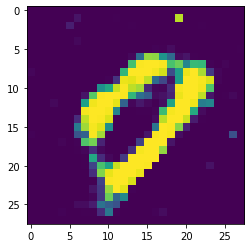

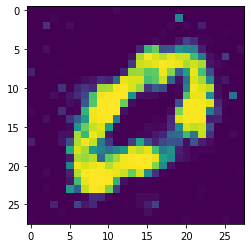

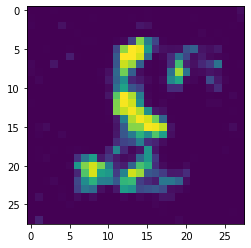

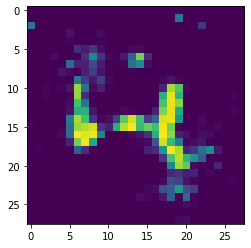

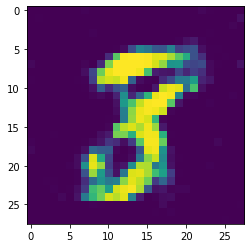

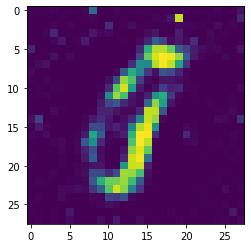

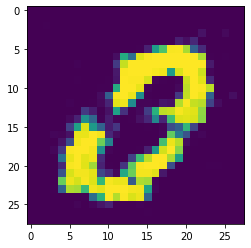

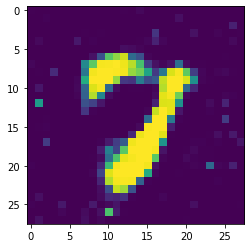

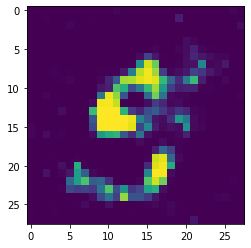

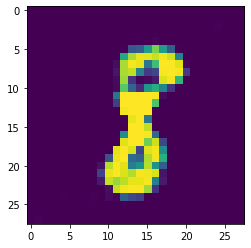

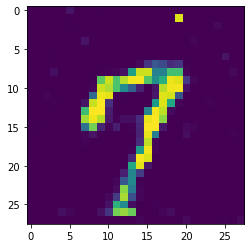

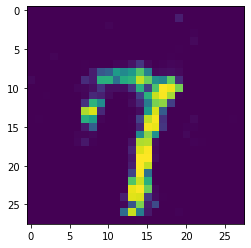

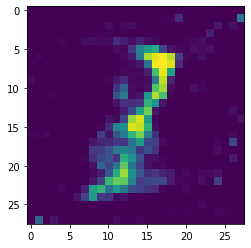

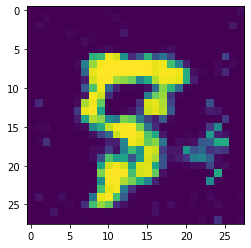

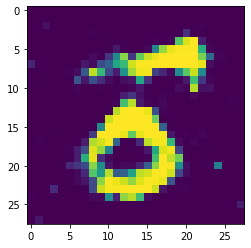

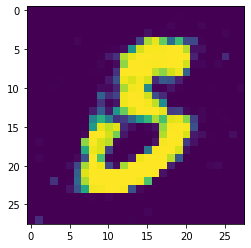

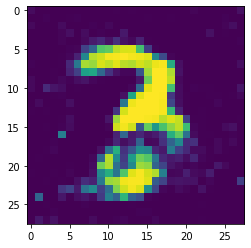

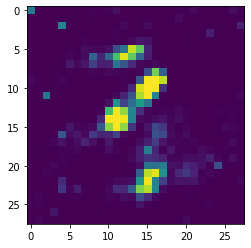

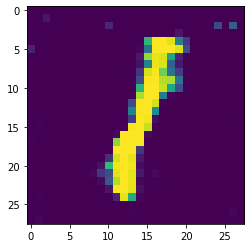

In [39]:
import matplotlib.pyplot as plt
test = torch.randn((32, 64)).to(DEVICE)
pred = gen(test)
pred = pred.view((32, 28, 28))
# pred = pred.cpu()
# pred = pred.detach().numpy()
# # for item in pred:
# #     item = item.reshape((28, 28))
# #     plt.imshow(item)
# #     plt.show()

print("abpve are predictions, below are ground truths \n\n")

def imshow(x):
    for img in x:
        img = img.cpu().detach().numpy()
        img = img.reshape((28, 28))
        plt.imshow(img)
        plt.show()

imshow(torchvision.utils.make_grid(pred))
print("=========================================")



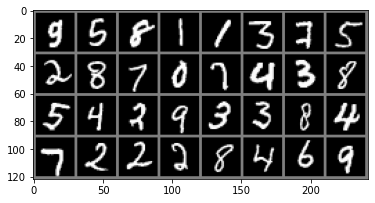

In [36]:
+def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.cpu().detach().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

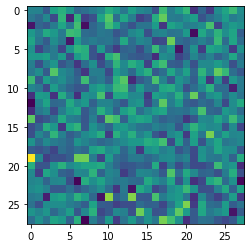

In [41]:
test = torch.randn((1, 784)).to(DEVICE)
test = test.cpu().detach().numpy()
test = test.reshape((28, 28))

plt.imshow(test)
plt.show()
